In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func

In [2]:
# Create engine using the `earthquakes.sqlite` database file
engine = create_engine("sqlite:///earthquakes.sqlite")

In [3]:
 # Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

earthquakes
--------
Date DATETIME
Time TEXT
Latitude FLOAT
Longitude FLOAT
Type TEXT
Depth FLOAT
Depth Error FLOAT
Depth Seismic Stations FLOAT
Magnitude FLOAT
Magnitude Type TEXT
Magnitude Error FLOAT
Magnitude Seismic Stations FLOAT
Azimuthal Gap FLOAT
Horizontal Distance FLOAT
Horizontal Error FLOAT
Root Mean Square FLOAT
ID TEXT
Source TEXT
Location Source TEXT
Magnitude Source TEXT
Status TEXT
Year INTEGER
Month INTEGER



In [5]:
conn = engine.connect() # Raw SQL/Pandas

In [9]:
# Raw SQL
query = text("""SELECT
                    Year as year,
                    count(ID) as num_earthquakes
                FROM
                    earthquakes
                GROUP BY
                    Year
                ORDER BY
                    Year asc;""")
df1 = pd.read_sql(query, con=conn)
df1.head(10)

,year,num_earthquakes
0,1965,6
1,1966,6
2,1967,7
3,1968,10
4,1969,8
5,1970,5
6,1971,9
7,1972,8
8,1973,3
9,1974,8


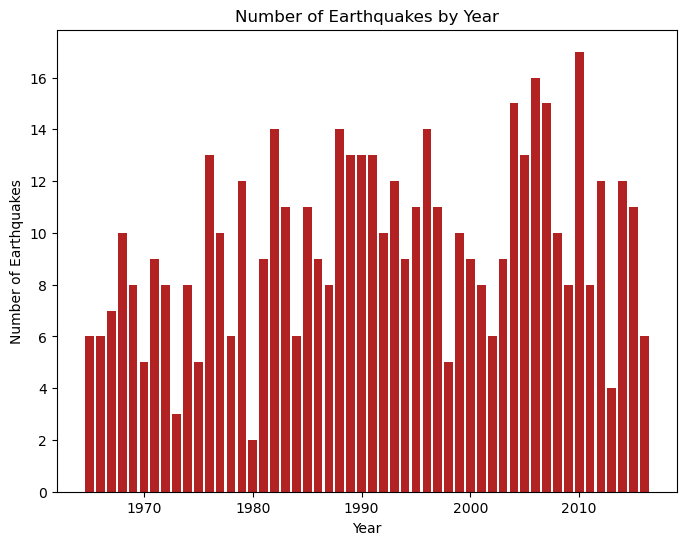

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(df1.year, df1.num_earthquakes, color="firebrick")
plt.title("Number of Earthquakes by Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.show()

In [12]:
# MAP Data

In [13]:
# Raw SQL
query = text("""SELECT
                    Year as year,
                    Magnitude as magnitude,
                    Source as source,
                    Type as type,
                    Latitude as latitude,
                    Longitude as longitude
                FROM
                    earthquakes
                ORDER BY
                    Year asc;""")
df2 = pd.read_sql(query, con=conn)
df2.head(10)

,year,magnitude,source,type,latitude,longitude
0,1965,6.4,ISCGEM,Earthquake,30.628,140.230
1,1965,5.6,ISCGEM,Earthquake,51.772,174.696
2,1965,5.9,ISCGEM,Earthquake,-5.201,151.583
3,1965,6.1,ISCGEM,Earthquake,52.192,173.437
4,1965,5.8,ISCGEM,Earthquake,51.294,179.092
5,1965,5.8,ISCGEM,Earthquake,-24.563,178.487
6,1966,6.0,ISCGEM,Earthquake,19.279,-108.270
7,1966,6.3,ISCGEM,Earthquake,-4.928,144.050
8,1966,5.7,ISCGEM,Earthquake,-6.384,131.044
9,1966,5.6,ISCGEM,Earthquake,6.600,-82.746


In [14]:
conn.close()
engine.dispose()